In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
from scipy.io import wavfile
import librosa
import librosa.display


In [2]:
rate, audio = wavfile.read('bach3.wav')

In [3]:
audio = np.mean(audio, axis=1)

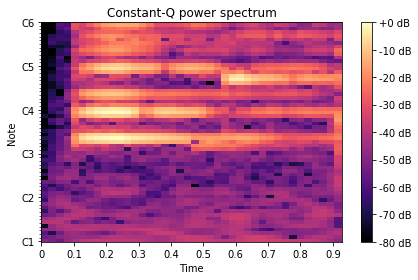

In [11]:
y, sr = librosa.load('bach3.wav')
#C = np.abs(librosa.cqt(y, sr=sr))
C = np.abs(librosa.cqt(y, sr=sr, fmin=librosa.note_to_hz('C2'), n_bins=60))
#C = np.abs(librosa.cqt(y, sr=sr, fmin=librosa.note_to_hz('C2'), n_bins=60 * 2, bins_per_octave=12 * 2))
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                         sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')
plt.tight_layout()



Audio length: 0.91 seconds


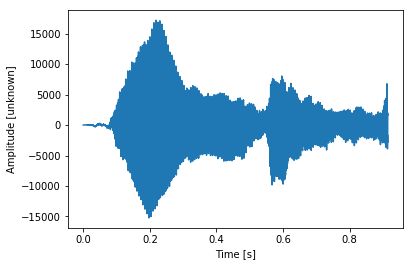

In [37]:
N = audio.shape[0]
L = N / rate

print(f'Audio length: {L:.2f} seconds')

f, ax = plt.subplots()
ax.plot(np.arange(N) / rate, audio)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude [unknown]');

In [38]:
from skimage import util

M = 1024

slices = util.view_as_windows(audio, window_shape=(M,), step=100)

In [39]:
win = np.hanning(M + 1)[:-1]
slices = slices * win
slices = slices.T

In [40]:
spectrum = np.fft.fft(slices, axis=0)[:M // 2 + 1:-1]
spectrum = np.abs(spectrum)

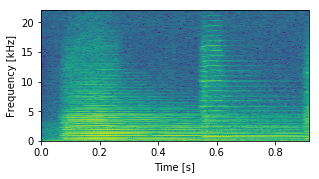

In [41]:
f, ax = plt.subplots(figsize=(4.8, 2.4))

S = np.abs(spectrum)
S = 20 * np.log10(S / np.max(S))

ax.imshow(S, origin='lower', cmap='viridis',
          extent=(0, L, 0, rate / 2 / 1000))
ax.axis('tight')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');

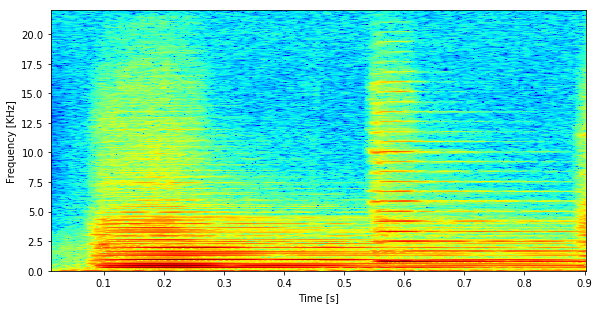

In [42]:
from scipy import signal

freqs, times, Sx = signal.spectrogram(audio, fs=rate, window='hanning',
                                      nperseg=1024, noverlap=M - 100,
                                      detrend=False, scaling='density')

f, ax = plt.subplots(figsize=(9.6, 4.8))
ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx), cmap='jet')
ax.set_ylabel('Frequency [KHz]')
ax.set_xlabel('Time [s]');